In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/07


In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
from root_numpy import hist2array


from pathlib import Path

In [3]:
def plot_dijet(M3, M2):
    filename = ("/STORE/ferencek/TRSM_XToHY_6b/2017/13TeV/NANOAOD/TRSM_XToHY_6b_M3_" + str(M3) + 
                "_M2_" + str(M2) + "_NANOAOD.root")
    if Path(filename).is_file():
        f = r.TFile.Open(filename)
        tree = f.Get("Events")
        
        
        hDijet01Masses = r.TH1F("dijet01m","",60,0,3000)
        hDijet02Masses = r.TH1F("dijet02m","",60,0,3000)
        hDijet12Masses = r.TH1F("dijet12m","",60,0,3000)

        nEvts = tree.GetEntriesFast()

        for i in range(nEvts):    
            tree.GetEvent(i)


            if tree.nFatJet<3:
                continue

            pts     = tree.FatJet_pt
            etas    = tree.FatJet_eta
            phis    = tree.FatJet_phi
            masses  = tree.FatJet_msoftdrop

            jet0Flag = pts[0]>250 and abs(etas[0])<2.5 and masses[0]>60
            jet1Flag = pts[1]>250 and abs(etas[1])<2.5 and masses[1]>60
            jet2Flag = pts[2]>250 and abs(etas[2])<2.5 and masses[2]>60

            if not (jet0Flag and jet1Flag and jet2Flag):
                continue

            jet0 = r.TLorentzVector()
            jet0.SetPtEtaPhiM(pts[0],etas[0],phis[0],masses[0])

            jet1 = r.TLorentzVector()
            jet1.SetPtEtaPhiM(pts[1],etas[1],phis[1],masses[1])

            jet2 = r.TLorentzVector()
            jet2.SetPtEtaPhiM(pts[2],etas[2],phis[2],masses[2])

            dijet01 = jet0 + jet1
            dijet02 = jet0 + jet2
            dijet12 = jet1 + jet2
            trijet012 = jet0 + jet1 + jet2

            hDijet01Masses.Fill(dijet01.M())
            hDijet02Masses.Fill(dijet02.M())
            hDijet12Masses.Fill(dijet12.M())
         
        plt.style.use([hep.style.CMS])
        
        dijet01, edges = hist2array(hDijet01Masses,return_edges=True)
        dijet02, edges = hist2array(hDijet02Masses,return_edges=True)
        dijet12, edges = hist2array(hDijet12Masses,return_edges=True)

        edges = edges[0]

        hep.histplot([dijet01,dijet02,dijet12],edges,label=["Dijet 01","Dijet 02","Dijet 12"],stack=True)

        hep.cms.text("Work in progress",loc=0)
        plt.ylabel("Event count / 50 GeV",horizontalalignment='right', y=1.0)
        plt.xlabel("Mass [GeV]",horizontalalignment='right', x=1.0)
        plt.xlim([0, 3000])
        plt.legend(loc='best')
            
           
            
            
    else:
        print (f"A file with m3 = {M3} and m2 = {M2} does not exist")
        


CPU times: user 6.66 s, sys: 111 ms, total: 6.77 s
Wall time: 6.75 s


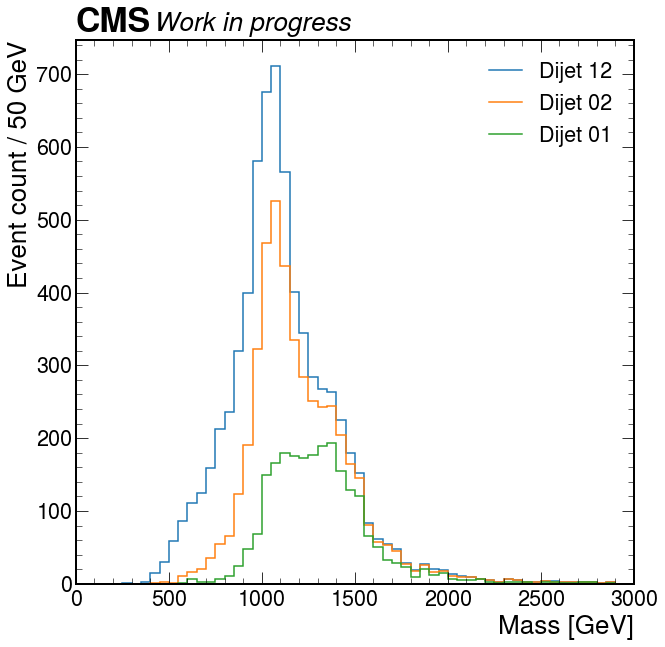

In [6]:
%%time
plot_dijet(M3=2000, M2=1100)
plt.savefig("2000 and 1100 masses.png")

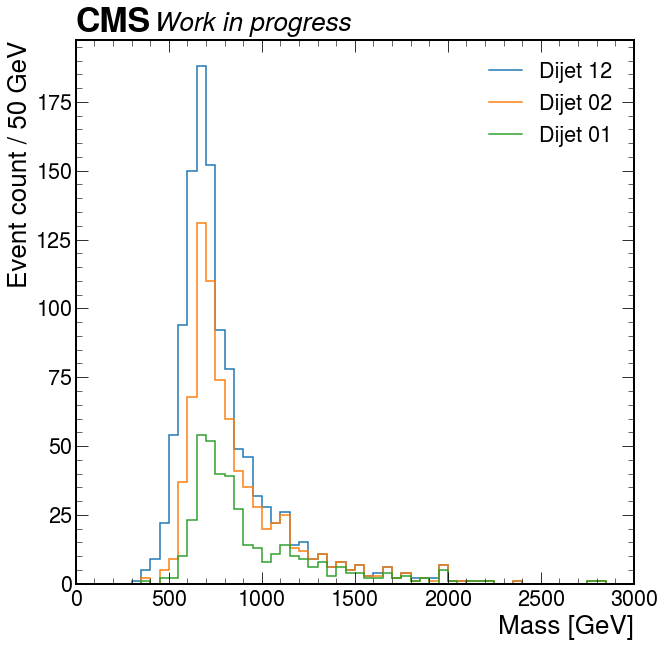

In [7]:
plot_dijet(M3=1200, M2=700)
plt.savefig("1200 and 700 masses.png")

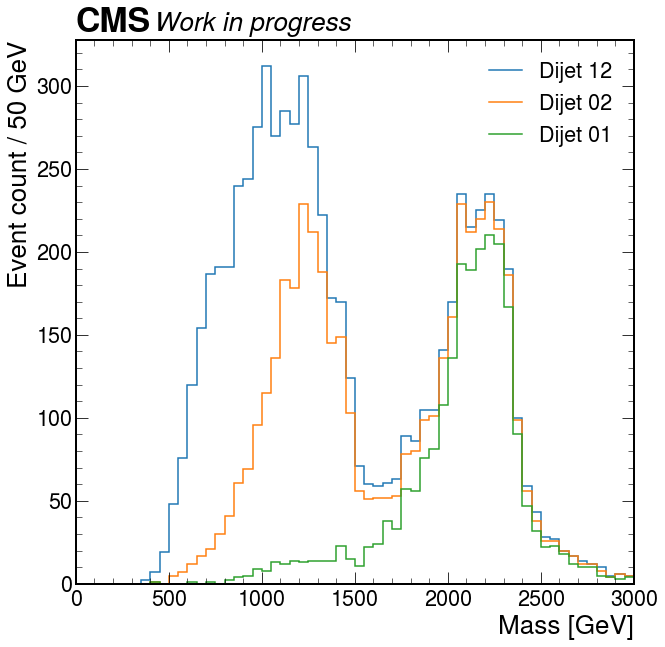

In [8]:
plot_dijet(M3=2800, M2=2300)
plt.savefig("2800 and 2300 masses.png")

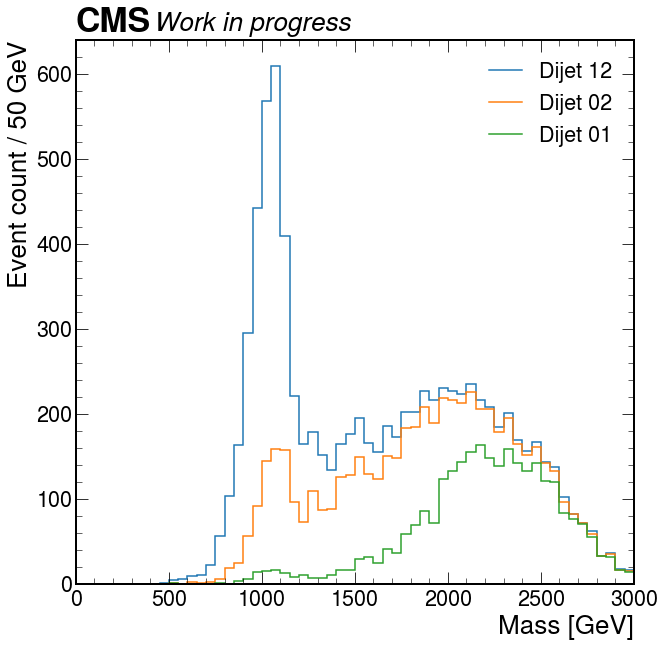

In [9]:
plot_dijet(M3=3200, M2=1100)
plt.savefig("3200 and 1100 masses.png")

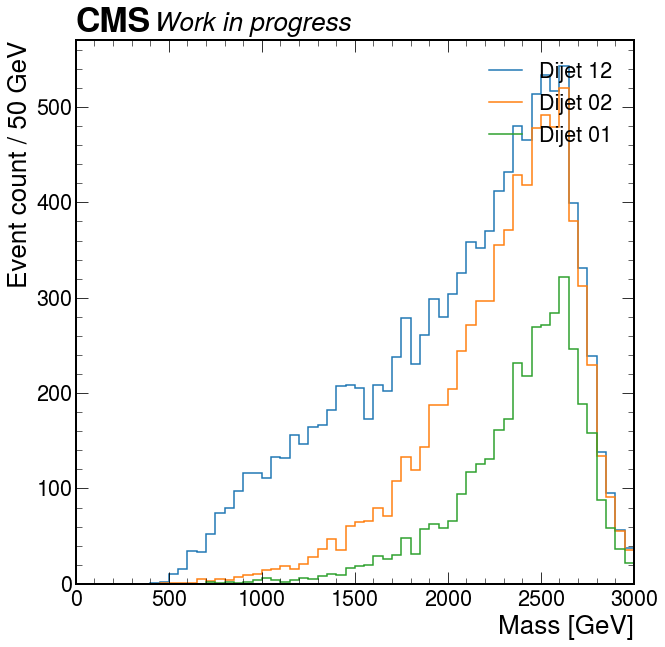

In [10]:
plot_dijet(M3=4000, M2=2700)
plt.savefig("4000 and 2700 masses.png")

In [ ]:
plot_dijet(M3=4000, M2=2700)
plt.savefig("4000 and 2700 masses.png")